In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
feature_vectors = pd.read_csv("combined-tsne.csv")
labels_true = feature_vectors["class"]
labels_true

0       anthrophony
1       anthrophony
2       anthrophony
3       anthrophony
4       anthrophony
           ...     
8836          other
8837          other
8838          other
8839          other
8840          other
Name: class, Length: 8841, dtype: object

In [3]:
feature_vectors["class"] = feature_vectors["class"].str.replace('other', str(0))
feature_vectors["class"] = feature_vectors["class"].str.replace('biophony', str(1))
feature_vectors["class"] = feature_vectors["class"].str.replace('geophony', str(2))
feature_vectors["class"] = feature_vectors["class"].str.replace('anthrophony', str(3))
y_km = feature_vectors["class"]
y_km = y_km.values
y_km

array(['3', '3', '3', ..., '0', '0', '0'], dtype=object)

In [4]:
feature_vectors = feature_vectors.drop(columns=["class"])
feature_vectors = feature_vectors.iloc[:, 0:13].values
feature_vectors

array([[0.62671421, 0.82768447, 0.93031283, ..., 0.44129606, 0.44969299,
        0.46737059],
       [0.46108699, 0.74474971, 0.88312501, ..., 0.42070303, 0.43636619,
        0.51938795],
       [0.39012605, 0.68204556, 0.95543333, ..., 0.54290695, 0.54647773,
        0.55531025],
       ...,
       [0.3017586 , 0.67512305, 0.53211044, ..., 0.16957708, 0.41965072,
        0.38854256],
       [0.35216836, 0.70140494, 0.51256943, ..., 0.15547327, 0.42957292,
        0.35627631],
       [0.48355306, 0.75698342, 0.42341653, ..., 0.20542165, 0.47175349,
        0.38722066]])

In [5]:
model = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1, random_state=0).fit_transform(feature_vectors)

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8841 samples in 0.015s...
[t-SNE] Computed neighbors for 8841 samples in 0.670s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8841
[t-SNE] Computed conditional probabilities for sample 2000 / 8841
[t-SNE] Computed conditional probabilities for sample 3000 / 8841
[t-SNE] Computed conditional probabilities for sample 4000 / 8841
[t-SNE] Computed conditional probabilities for sample 5000 / 8841
[t-SNE] Computed conditional probabilities for sample 6000 / 8841
[t-SNE] Computed conditional probabilities for sample 7000 / 8841
[t-SNE] Computed conditional probabilities for sample 8000 / 8841
[t-SNE] Computed conditional probabilities for sample 8841 / 8841
[t-SNE] Mean sigma: 0.052268
[t-SNE] Computed conditional probabilities in 0.202s
[t-SNE] Iteration 50: error = 89.5557709, gradient norm = 0.0029575 (50 iterations in 4.132s)
[t-SNE] Iteration 100: error = 75.9794006, gradient norm = 0.0008665 (50 iterations in 3

In [6]:
import numpy as np
np.savetxt("combined-3d.csv", model, delimiter=",", header="x, y, z")

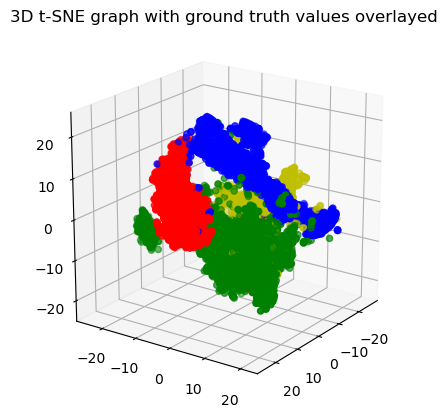

In [10]:
colors = ['r', 'g', 'b', 'y']
y_int = [int(label) for label in y_km]
# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(model[:, 0], model[:, 1], model[:, 2], c=[colors[label] for label in y_int])

# Set the viewing angle of the plot
ax.view_init(elev=20, azim=35)

# Allow interactive rotation of the plot
ax.set_box_aspect([1,1,1])
ax.mouse_init()

# Show plot
plt.title("3D t-SNE graph with ground truth values overlayed")
plt.show()

Silhouette analysis for 3 tsne components (6 is the best average)

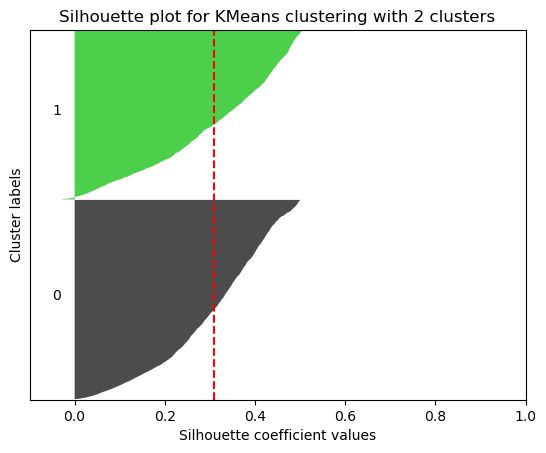

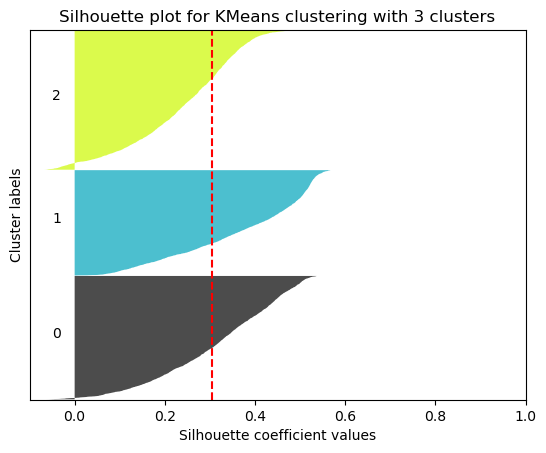

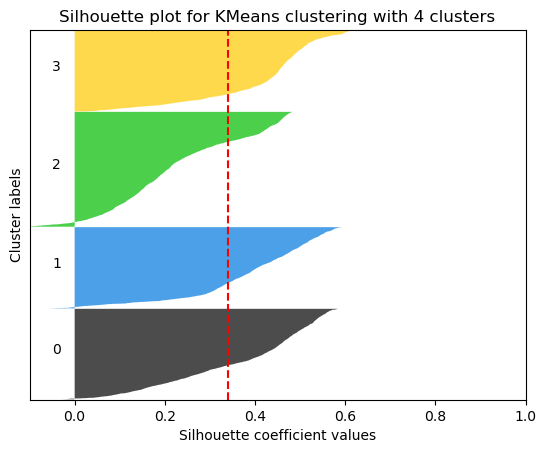

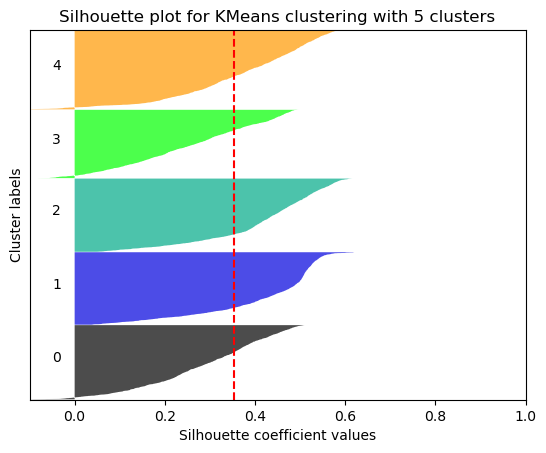

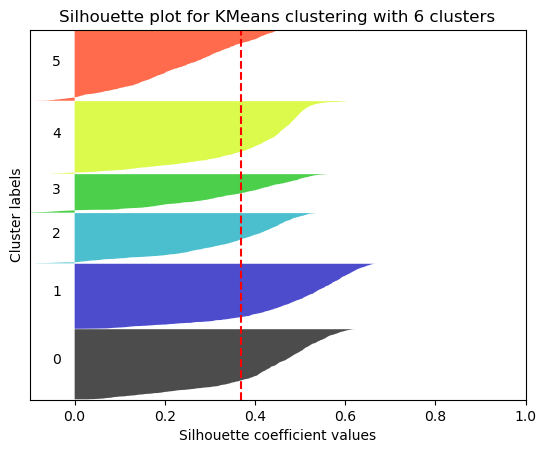

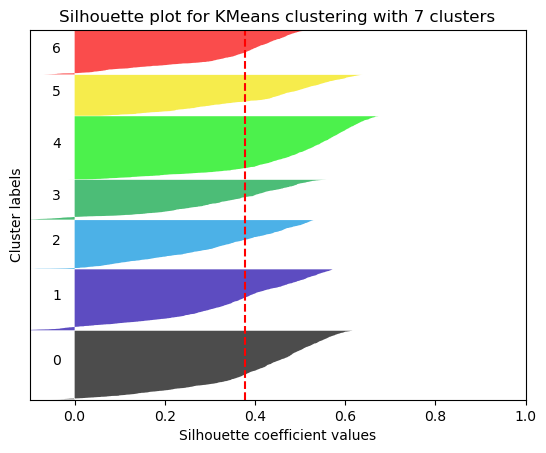

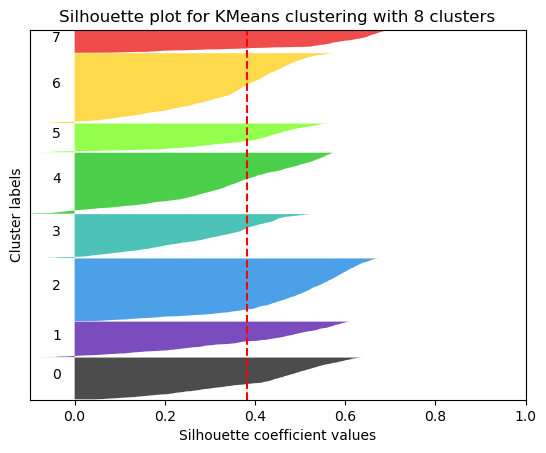

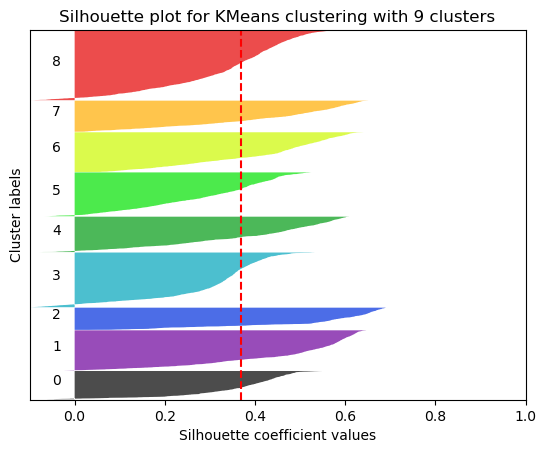

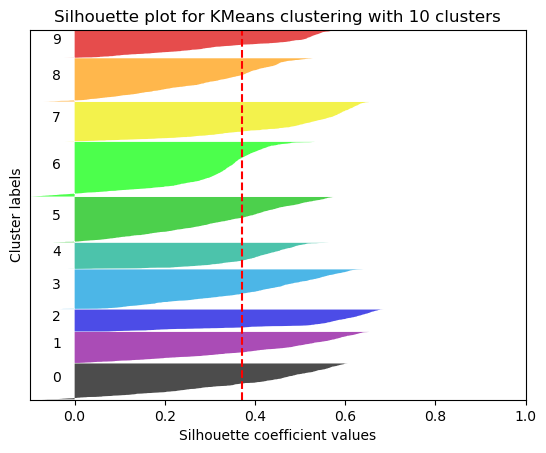

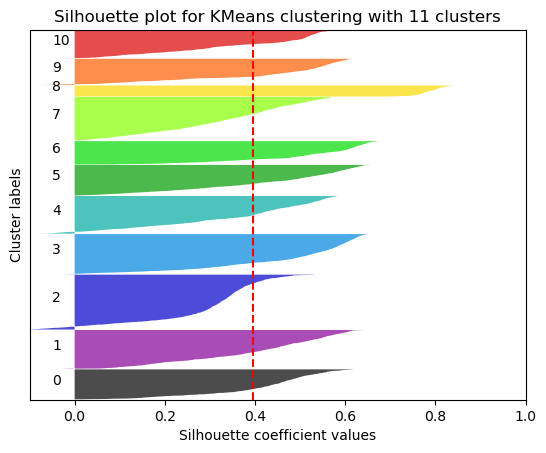

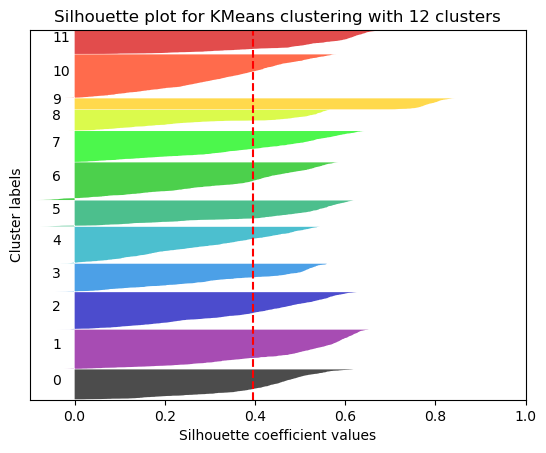

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

X = model
# Define the range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 12

# Initialize variables to store best cluster number and best silhouette score
best_n_clusters = None
best_score = -1

# Iterate over different cluster numbers and compute silhouette scores and plots
for n_clusters in range(min_clusters, max_clusters+1):
    # Fit KMeans clustering model with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    # Compute silhouette scores and plot
    fig, ax = plt.subplots()
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_scores = silhouette_samples(X, kmeans.labels_)
    y_lower = 10
    for i in range(n_clusters):
        cluster_scores = silhouette_scores[kmeans.labels_ == i]
        cluster_scores.sort()
        size_cluster_i = len(cluster_scores)
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_scores, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax.set_title("Silhouette plot for KMeans clustering with {} clusters".format(n_clusters))
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster labels")
    ax.axvline(x=silhouette_score(X, kmeans.labels_, metric='euclidean'), color="red", linestyle="--")
    ax.set_yticks([])
    plt.show()


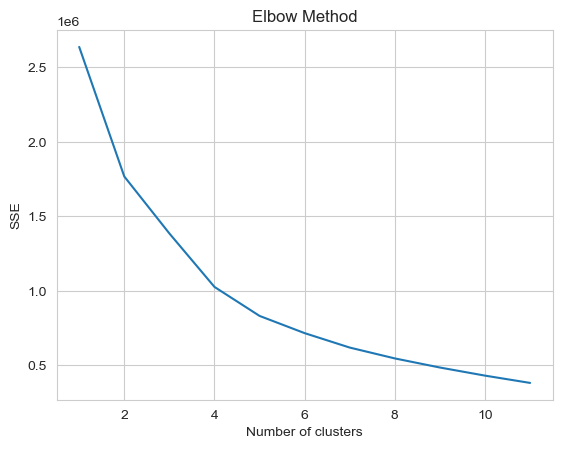

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize an empty list to store SSE values
sse = []

# Fit KMeans algorithm on the dataset for k values from 1 to 10
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(model)
    sse.append(kmeans.inertia_)

# Plot SSE against k
sns.set_style("whitegrid")
plt.plot(range(1, 12), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [13]:
from sklearn.cluster import AgglomerativeClustering

single_linkage = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='average')
labels_pred = single_linkage.fit_predict(model)
labels = single_linkage.labels_

In [18]:
print(purity_score(labels_true, labels_pred))

0.8063567469743241


In [19]:
metrics.rand_score(labels_true, labels_pred)

0.7812430106338168

In [20]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.3520168334126091

In [21]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.4985252864716863

In [22]:
metrics.homogeneity_score(labels_true, labels_pred)

0.6816582798685998

In [23]:
metrics.completeness_score(labels_true, labels_pred)

0.39355379457671064

In [24]:
metrics.v_measure_score(labels_true, labels_pred)

0.4990070499074667

In [25]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.5069284465337818

In [32]:
# from sklearn.cluster import KMeans
# km = KMeans(n_clusters=6, init='k-means++', random_state=42)
# y_km = km.fit_predict(model)
# labels = km.labels_

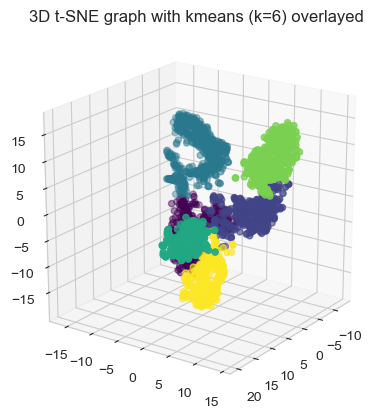

In [40]:
colors = ['r', 'g', 'b', 'y', 'rx', 'c', 'm']
y_int = [int(label) for label in labels]
# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(model[:, 0], model[:, 1], model[:, 2], c=labels, cmap='viridis')

# Set the viewing angle of the plot
ax.view_init(elev=20, azim=35)

# Allow interactive rotation of the plot
ax.set_box_aspect([1,1,1])
ax.mouse_init()

# Show plot
plt.title("3D t-SNE graph with kmeans (k=6) overlayed")
plt.show()

In [17]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd
from sklearn import metrics

In [15]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

In [26]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}
X = model
y = labels_true

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 11, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    print(f"Rand-score for {dist_measure} is {round(metrics.rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Rand-score for {dist_measure} is {round(metrics.adjusted_rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Mutual-score for {dist_measure} is {round(metrics.adjusted_mutual_info_score(y, pyLabels)*100, 2)}%")
    print(f"Homogeneity-score for {dist_measure} is {round(metrics.homogeneity_score(y, pyLabels)*100, 2)}%")
    print(f"Completeness-score for {dist_measure} is {round(metrics.completeness_score(y, pyLabels)*100, 2)}%")
    print(f"V-measure-score for {dist_measure} is {round(metrics.v_measure_score(y, pyLabels)*100, 2)}%")
    print(f"Fowlkes-mallows-score for {dist_measure} is {round(metrics.fowlkes_mallows_score(y, pyLabels)*100, 2)}%")
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")
    print(" ")

Rand-score for 0 is 77.43%
Adj-Rand-score for 0 is 31.46%
Adj-Mutual-score for 0 is 50.27%
Homogeneity-score for 0 is 70.96%
Completeness-score for 0 is 38.97%
V-measure-score for 0 is 50.31%
Fowlkes-mallows-score for 0 is 47.63%
The purity score for euclidean distance is 85.94%
 
Rand-score for 1 is 77.42%
Adj-Rand-score for 1 is 31.44%
Adj-Mutual-score for 1 is 50.25%
Homogeneity-score for 1 is 70.95%
Completeness-score for 1 is 38.96%
V-measure-score for 1 is 50.3%
Fowlkes-mallows-score for 1 is 47.61%
The purity score for squared euclidean distance is 85.93%
 
Rand-score for 2 is 77.02%
Adj-Rand-score for 2 is 30.56%
Adj-Mutual-score for 2 is 48.42%
Homogeneity-score for 2 is 67.85%
Completeness-score for 2 is 37.69%
V-measure-score for 2 is 48.46%
Fowlkes-mallows-score for 2 is 46.65%
The purity score for manhattan distance is 82.6%
 
Rand-score for 3 is 77.36%
Adj-Rand-score for 3 is 31.14%
Adj-Mutual-score for 3 is 49.52%
Homogeneity-score for 3 is 70.02%
Completeness-score for 